<h1>Week 05 (Class Practice)<br>Sherin Alvinia Yonatan - 0706022310013

The explanation of the steps will use mix langauage (Indo and English)

In [ ]:
# import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree

In [ ]:
# load dataset
pd.set_option('display.max_columns', None) # Display all columns

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/exercise_employee_attrition.csv"
df = pd.read_csv(url)
df.head()

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Female,Married,IT,Manager,1,15488,28,15,4,2,1,3,4,14,No,6,54,17,4,4,4,20,3,No
1,2,48,Female,Married,Sales,Assistant,5,13079,28,6,9,1,2,1,1,6,Yes,2,45,1,4,1,2,25,2,No
2,3,34,Male,Married,Marketing,Assistant,1,13744,24,24,14,8,3,2,1,77,Yes,6,34,2,3,4,4,45,3,No
3,4,27,Female,Divorced,Marketing,Manager,1,6809,26,10,8,2,3,5,4,49,No,9,48,18,2,3,1,35,3,No
4,5,40,Male,Divorced,Marketing,Executive,1,10206,52,29,10,1,2,5,1,64,No,3,33,0,4,1,3,44,3,No


In [ ]:
# get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    1000 non-null   int64 
 1   Age                            1000 non-null   int64 
 2   Gender                         1000 non-null   object
 3   Marital_Status                 1000 non-null   object
 4   Department                     1000 non-null   object
 5   Job_Role                       1000 non-null   object
 6   Job_Level                      1000 non-null   int64 
 7   Monthly_Income                 1000 non-null   int64 
 8   Hourly_Rate                    1000 non-null   int64 
 9   Years_at_Company               1000 non-null   int64 
 10  Years_in_Current_Role          1000 non-null   int64 
 11  Years_Since_Last_Promotion     1000 non-null   int64 
 12  Work_Life_Balance              1000 non-null   int64 
 13  Job_

In [ ]:
# get statistical info from dataset
df.describe()

,Employee_ID,Age,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,39.991000,3.055000,11499.899000,57.837000,14.922000,7.539000,4.40800,2.495000,3.151000,2.52700,50.043000,4.877000,44.553000,9.524000,2.494000,2.519000,2.503000,24.507000,2.484000
std,288.819436,11.780055,1.399977,4920.529231,24.702037,8.350548,4.001061,2.99508,1.105077,1.426967,1.13073,28.204657,2.546833,8.704192,5.973534,1.110494,1.106736,1.099636,14.138099,1.111296
min,1.000000,20.000000,1.000000,3001.000000,15.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.00000,0.000000,1.000000,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.750000,30.000000,2.000000,7395.750000,36.000000,8.000000,4.000000,2.00000,2.000000,2.000000,2.00000,26.000000,3.000000,37.000000,4.000000,2.000000,2.000000,2.000000,12.000000,1.000000
50%,500.500000,41.000000,3.000000,11256.000000,58.000000,15.000000,8.000000,4.00000,3.000000,3.000000,3.00000,50.000000,5.000000,45.000000,9.000000,2.000000,3.000000,3.000000,24.000000,2.000000
75%,750.250000,50.250000,4.000000,15855.000000,80.000000,22.000000,11.000000,7.00000,3.000000,4.000000,4.00000,75.250000,7.000000,52.000000,15.000000,4.000000,4.000000,3.000000,37.000000,3.000000
max,1000.000000,59.000000,5.000000,19999.000000,99.000000,29.000000,14.000000,9.00000,4.000000,5.000000,4.00000,99.000000,9.000000,59.000000,19.000000,4.000000,4.000000,4.000000,49.000000,4.000000


<h2> Data Preprocessing

In [ ]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Employee_ID': array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
          34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
          45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
          56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
          67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
          78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
          89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
         100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  14

In [ ]:
# Drop Employee_ID, because it does not give a predictive information, it's just a unique number.
# Drop Hourly_Rate, because there is already monthly income that can give a conclusion of the employee income.

df = df.drop(columns=['Employee_ID', 'Hourly_Rate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1000 non-null   int64 
 1   Gender                         1000 non-null   object
 2   Marital_Status                 1000 non-null   object
 3   Department                     1000 non-null   object
 4   Job_Role                       1000 non-null   object
 5   Job_Level                      1000 non-null   int64 
 6   Monthly_Income                 1000 non-null   int64 
 7   Years_at_Company               1000 non-null   int64 
 8   Years_in_Current_Role          1000 non-null   int64 
 9   Years_Since_Last_Promotion     1000 non-null   int64 
 10  Work_Life_Balance              1000 non-null   int64 
 11  Job_Satisfaction               1000 non-null   int64 
 12  Performance_Rating             1000 non-null   int64 
 13  Trai

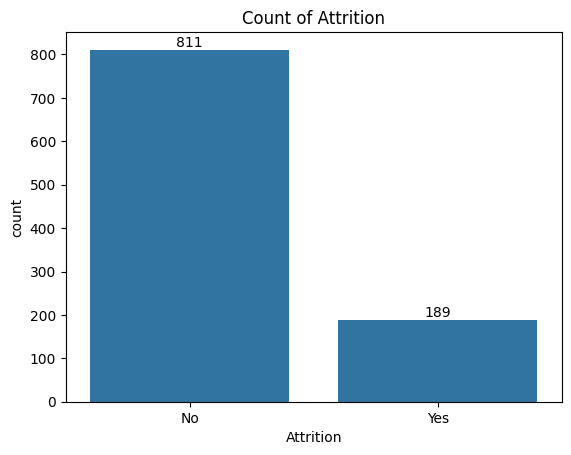

In [ ]:
# show how many attrition
ax = sns.countplot(data=df, x='Attrition')
plt.title('Count of Attrition')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# imbalance dataset but it's okay let us try firsttt

<h2>Feature Encoding

In [ ]:
# Check Unique
# So, that it's also can help me to know which one is need to be categorical as ordinal and nominal by looking at the values.
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Age': array([58, 48, 34, 27, 40, 38, 42, 30, 43, 55, 59, 22, 41, 21, 49, 57, 52,
        31, 44, 46, 47, 35, 56, 26, 28, 37, 23, 33, 45, 39, 54, 36, 25, 53,
        29, 50, 20, 24, 32, 51]),
 'Gender': array(['Female', 'Male'], dtype=object),
 'Marital_Status': array(['Married', 'Divorced', 'Single'], dtype=object),
 'Department': array(['IT', 'Sales', 'Marketing', 'Finance', 'HR'], dtype=object),
 'Job_Role': array(['Manager', 'Assistant', 'Executive', 'Analyst'], dtype=object),
 'Job_Level': array([1, 5, 3, 2, 4]),
 'Monthly_Income': array([15488, 13079, 13744,  6809, 10206, 16746, 18995, 19035, 14671,
        16210,  8197, 18553, 10452, 11718, 17859,  5172, 16158, 19663,
        14085,  6981,  8247, 13553,  9135,  8573, 16731, 10189, 17541,
        13878, 14087, 16667,  5776, 12311, 10697, 17629, 11386, 11044,
        12615, 18034,  8060, 13900,  8581,  5014, 15997, 13635, 16648,
        10148, 17022,  8919, 18886,  9638,  7651,  3609, 10940, 13348,
         6866, 19755, 19999,  5

In [ ]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. One-Hot Encoding
# Columns: Attrition, Gender, OverTime

one_hot_map = {
    'Attrition': {'No': 0, 'Yes': 1},
    'Gender': {'Female': 0, 'Male': 1},
    'Overtime': {'No': 0, 'Yes': 1}
}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)

# 2. Ordinal Encoding
ordinal_cols = [
   'Job_Level', 'Work_Life_Balance', 'Job_Satisfaction',
   'Performance_Rating', 'Work_Environment_Satisfaction',
   'Relationship_with_Manager', 'Job_Involvement'
]
# Karena semua sudah terkonversi ke integer, jadi tidak diapa2kan

# 2. Nominal Encoding
# Suppose you already fitted the encoder:
nominal_cols = ['Marital_Status', 'Department', 'Job_Role']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'Department': {'Finance': 0, 'HR': 1, 'IT': 2, 'Marketing': 3, 'Sales': 4},
 'Job_Role': {'Analyst': 0, 'Assistant': 1, 'Executive': 2, 'Manager': 3},
 'Marital_Status': {'Divorced': 0, 'Married': 1, 'Single': 2}}


,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
405,40,1,2.0,3.0,3.0,3,4181,25,5,1,3,3,3,8,0,2,36,4,1,3,4,44,3,0
550,29,1,1.0,3.0,0.0,5,18901,3,11,4,1,3,4,69,1,4,37,11,2,1,4,40,4,0
776,44,0,1.0,0.0,3.0,3,14875,21,7,1,4,4,4,82,0,1,34,14,1,4,3,22,4,0
47,54,1,0.0,0.0,2.0,2,8919,13,8,9,2,5,1,74,1,6,36,19,3,3,2,46,1,0
192,24,0,0.0,1.0,3.0,3,16107,21,5,1,3,3,3,85,1,4,42,5,3,1,1,28,2,0


In [ ]:
# checking encode result
df.loc[480]

,480
Age,31
Gender,Female
Marital_Status,Single
Department,Marketing
Job_Role,Manager
Job_Level,5
Monthly_Income,4191
Years_at_Company,18
Years_in_Current_Role,3
Years_Since_Last_Promotion,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1000 non-null   int64 
 1   Gender                         1000 non-null   object
 2   Marital_Status                 1000 non-null   object
 3   Department                     1000 non-null   object
 4   Job_Role                       1000 non-null   object
 5   Job_Level                      1000 non-null   int64 
 6   Monthly_Income                 1000 non-null   int64 
 7   Years_at_Company               1000 non-null   int64 
 8   Years_in_Current_Role          1000 non-null   int64 
 9   Years_Since_Last_Promotion     1000 non-null   int64 
 10  Work_Life_Balance              1000 non-null   int64 
 11  Job_Satisfaction               1000 non-null   int64 
 12  Performance_Rating             1000 non-null   int64 
 13  Trai

<h2>Seperate Features and Target
<p>Subtask: Define the feature (X) and the target variable (y)

Reasoning: Define the features (X) by dropping the target variable 'Attrition' from the DataFrame and define the target variable (y) as the 'Attrition' column.

In [ ]:
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

In [ ]:
X.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
0,58,0,1.0,2.0,3.0,1,15488,15,4,2,1,3,4,14,0,6,54,17,4,4,4,20,3
1,48,0,1.0,4.0,1.0,5,13079,6,9,1,2,1,1,6,1,2,45,1,4,1,2,25,2
2,34,1,1.0,3.0,1.0,1,13744,24,14,8,3,2,1,77,1,6,34,2,3,4,4,45,3
3,27,0,0.0,3.0,3.0,1,6809,10,8,2,3,5,4,49,0,9,48,18,2,3,1,35,3
4,40,1,0.0,3.0,2.0,1,10206,29,10,1,2,5,1,64,0,3,33,0,4,1,3,44,3


In [ ]:
y.head()

,Attrition
0,0
1,0
2,0
3,0
4,0


<h2>Split Data
<p>Subtask: Split the encoded data into training and testing sets.
<p>Reasoning: Split the encoded feature DataFrame X and the target Series y into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((700, 23), (300, 23))

In [ ]:
X_train.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
670,53,1,2.0,4.0,1.0,5,4449,5,10,6,2,2,4,88,1,1,48,5,2,2,2,2,4
6,38,1,0.0,1.0,0.0,1,18995,29,1,1,4,5,1,43,0,2,55,13,1,1,3,40,2
477,42,0,1.0,4.0,0.0,1,19862,24,9,7,4,2,1,42,0,5,37,4,2,1,2,38,3
158,46,1,0.0,0.0,1.0,2,8599,7,7,7,2,4,1,60,0,5,35,1,4,1,3,5,1
508,55,0,2.0,0.0,3.0,3,13724,20,8,3,3,4,4,1,0,8,45,4,4,3,3,34,2


In [ ]:
X_test.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
25,44,1,0.0,0.0,0.0,1,10189,26,8,8,2,2,2,46,0,7,44,7,4,3,2,46,1
464,40,1,2.0,3.0,1.0,2,19252,18,12,5,4,2,4,72,1,1,30,3,4,2,3,5,2
372,56,1,1.0,2.0,3.0,4,14126,24,9,0,3,3,3,37,1,4,51,16,3,4,2,46,4
730,48,1,2.0,0.0,2.0,5,4867,12,9,4,3,1,3,70,0,2,33,7,3,2,4,26,4
757,54,1,1.0,3.0,0.0,1,4230,2,5,6,1,4,2,16,1,2,45,18,1,2,1,9,1


<h2>Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

# Membuat model Decision Tree Classifier untuk prediksi Attrition
# Model ini akan belajar dari X_train dan akan memprediksi target untuk Xtrain dan Xtest (predict)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       575
           1       1.00      1.00      1.00       125

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       236
           1       0.22      0.20      0.21        64

    accuracy                           0.67       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.67      0.67      0.67       300



Training test pada precision, recall, f1 bernilai 1.00 (100%) yang berarti model ini memprediksi data training tanpa ada error sama sekali, tetapi karena model terlalu menghafal data training, maka hasil di test datanya tidak merata dan turun drastis menjadi 0.67.

# What to do next?
*   The F1 Score also significantly different so we need to handle this imbalance dataset. <br>
*   The accuracy of training set is 100% and testing set is 67%. This indicates overfitting, therefore we need to apply pre-prunning to the tree. We will tune the parameter by add a max_depth (limiting the depth/ branching of tree) and etc. <br>
*   And maybe we need to select and drop some features for the model.

<h2>Oversampling using SMOTENC<br>
<p>Metode ini dipakai untuk menangani class imbalance dalam data target (attirition) dan mengurangi bias.

In [ ]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih data yang termasuk kategorikal (bukan continue)
categorical_features = [
    'Gender',
    'Marital_Status',
    'Department',
    'Job_Role',
    'Overtime',
    'Work_Life_Balance',
    'Job_Satisfaction',
    'Performance_Rating',
    'Work_Environment_Satisfaction',
    'Relationship_with_Manager',
    'Job_Involvement'
]

# --- IMPORTANT ---
# SMOTENC expects categorical feature *indices*, not names
# So if X is a DataFrame, convert names → indices:
cat_indices = [X.columns.get_loc(col) for col in categorical_features]

# Apply SMOTENC
smotenc = SMOTENC(categorical_features=cat_indices, random_state=42)
X_res, y_res = smotenc.fit_resample(X, y)

# Partition AFTER resampling
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)
# 70% data training, 30% testing, menggunakan random_state=42

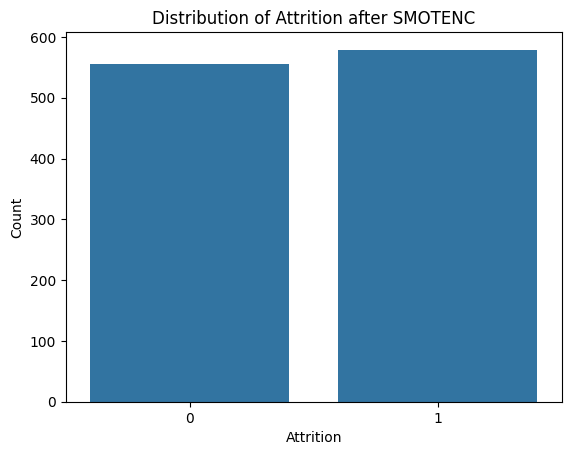

In [ ]:
sns.countplot(x=y_train)
plt.title('Distribution of Attrition after SMOTENC')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

Dapat dilihat pada distribusinya sudah lebih seimbang

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1000 non-null   int64 
 1   Gender                         1000 non-null   object
 2   Marital_Status                 1000 non-null   object
 3   Department                     1000 non-null   object
 4   Job_Role                       1000 non-null   object
 5   Job_Level                      1000 non-null   int64 
 6   Monthly_Income                 1000 non-null   int64 
 7   Years_at_Company               1000 non-null   int64 
 8   Years_in_Current_Role          1000 non-null   int64 
 9   Years_Since_Last_Promotion     1000 non-null   int64 
 10  Work_Life_Balance              1000 non-null   int64 
 11  Job_Satisfaction               1000 non-null   int64 
 12  Performance_Rating             1000 non-null   int64 
 13  Trai

In [ ]:
# BUILD CLASSIFICATION MODEL but with no parameters :(
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       556
           1       1.00      1.00      1.00       579

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.72      0.67      0.70       255
           1       0.66      0.72      0.69       232

    accuracy                           0.69       487
   macro avg       0.69      0.69      0.69       487
weighted avg       0.69      0.69      0.69       487



Dilihat dari hasilnya, training accuracynya sudah 1 (100%) yang berarti model sudah menghafal data training, tetapi pada test hanya 69% karena model gagal generalisasi ke data baru yang sudah dikategorikan. Hal ini bisa disebabkan karena pada decision tree classifiernya tidak ada batas. Hal ini masuk akal karena tidak ada hyperparameternya.

<h2>KFold Cross Validation<br>
<p>Model ini dipakai untuk melihat stabilitas data.

In [ ]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=0)

cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

# Jadi dibagi menjadi 5 dataset, 4 training, 1 testing, dan diulang 5x untuk menjadi test test

Fold:1, Train set: 800, Test set:200
Fold:2, Train set: 800, Test set:200
Fold:3, Train set: 800, Test set:200
Fold:4, Train set: 800, Test set:200
Fold:5, Train set: 800, Test set:200


In [ ]:
from sklearn.tree import DecisionTreeClassifier

score = cross_val_score(DecisionTreeClassifier(random_state= 0), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.175      0.16666667 0.15909091 0.2195122  0.23913043]
Average score: 0.19


Hasil score 0.19 menunjukkan bahwa model ini belum mampu menangkap pola dengan baik, kemungkinan besar karena model overfitting pada beberapa fold karena terlalu menyesuaikan data training atau underfitting karena parameter default terlalu sederhana. hasil score rendah  ini karena ada ketidakseimbangan data.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters
# Saya menyempitkan parameternya agar lebih seimbang.
# criterion: Rumus pemisahan node (gini atau entropy).
# max_depth: Seberapa dalam pohon boleh tumbuh (mencegah overfitting).
# min_samples_split: Minimum jumlah data agar node boleh dipecah.
# min_samples_leaf: Minimum jumlah data dalam setiap daun (leaf).
# class_weight: Memberikan bobot berbeda untuk menangani class imbalance.
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 5, 10],
    'class_weight': [None, 'balanced']
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters:  {'class_weight': None, 'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 20}
Best cross-validation f1 score: 0.730


Hasil menunjukkan parameter terbaik dan menunjukkan F1 scorenya meningkat dari 0.20 menjadi 0.730. Hasil dari gridSearchCV menunjukkan bahwa parameter yang baik meningkatkan peforma model DT.

<h2>Feature Importance

In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[0.07526877 0.00173729 0.01758047 0.01441754 0.02493334 0.06816663
 0.15007814 0.06133117 0.03289905 0.07523254 0.00691145 0.019799
 0.00336938 0.10066719 0.00293806 0.04691464 0.0792535  0.06945941
 0.01128217 0.01890393 0.01932127 0.06180822 0.03772685]


Code di atas menunjukkan nilai pentingnya setiap fitur dan besar kontribusi terhadap keputusan model dalam prediksi

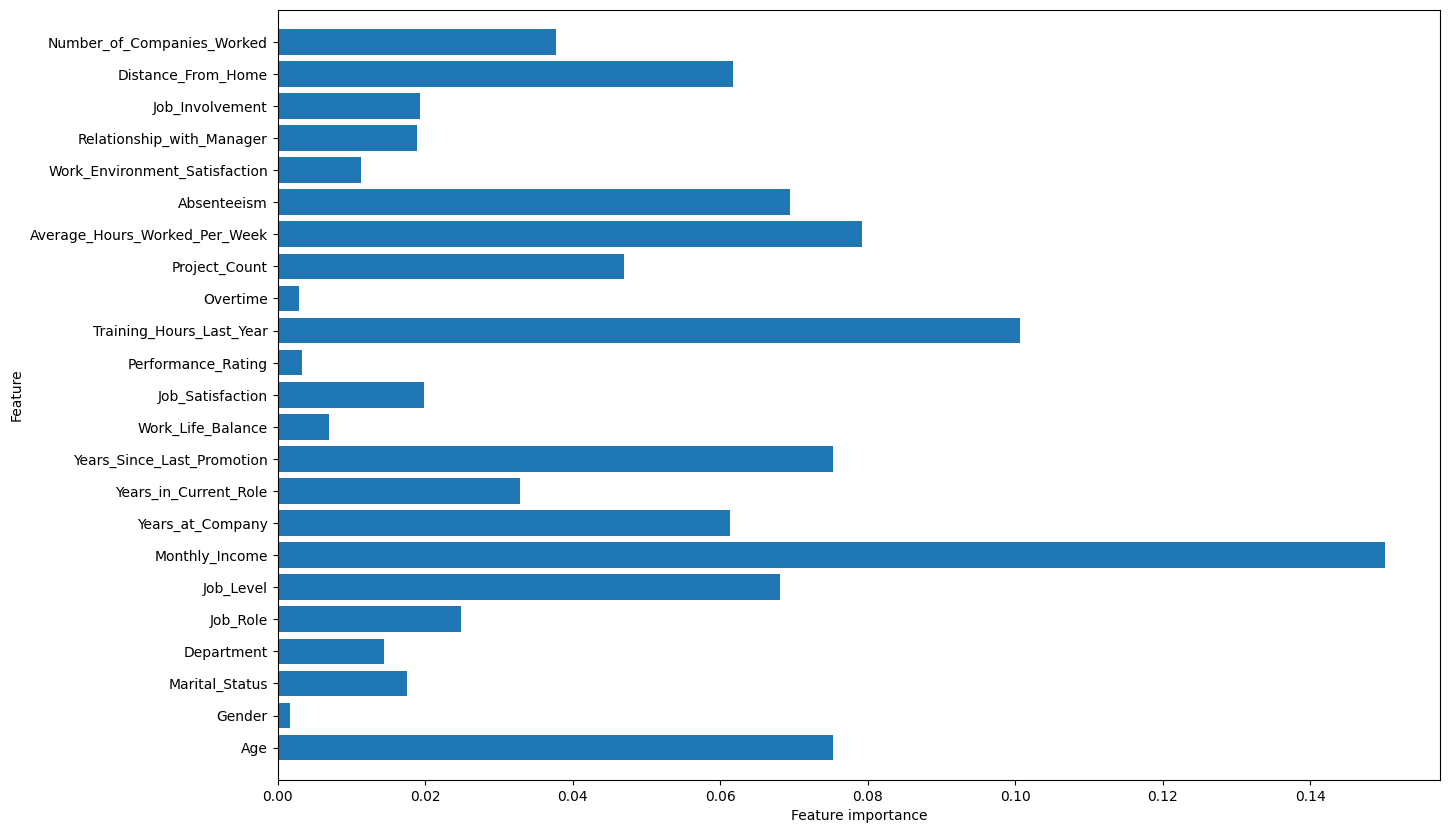

In [ ]:
# visualize important features
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]  # Get the number of features from X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Use column names from X_train as labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(tree)

Horizontal bar chart ini menunjukkan urutan fitur dari paling berpengaruh hingga paling kecil.
Semakin panjang batang (bar), semakin penting fitur itu bagi prediksi model.

In [ ]:
# Show feature importances greater than 0.05
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

,0
Monthly_Income,0.150078
Training_Hours_Last_Year,0.100667
Average_Hours_Worked_Per_Week,0.079254
Age,0.075269
Years_Since_Last_Promotion,0.075233
Absenteeism,0.069459
Job_Level,0.068167
Distance_From_Home,0.061808
Years_at_Company,0.061331


Saya memilih 10 fitur dengna nilai importance > 0.05

In [ ]:
# using only important features for the prediction

important_features = ["Monthly_Income", "Training_Hours_Last_Year", "Average_Hours_Worked_Per_Week", "Age", "Absenteeism", "Job_Level", "Distance_From_Home", "Years_at_Company"]
X_importance = df_encoded[important_features] #input
y_importance = df_encoded['Attrition'] #target

In [ ]:
display(X_importance)
display(y_importance)

,Monthly_Income,Training_Hours_Last_Year,Average_Hours_Worked_Per_Week,Age,Absenteeism,Job_Level,Distance_From_Home,Years_at_Company
0,15488,14,54,58,17,1,20,15
1,13079,6,45,48,1,5,25,6
2,13744,77,34,34,2,1,45,24
3,6809,49,48,27,18,1,35,10
4,10206,64,33,40,0,1,44,29
...,...,...,...,...,...,...,...,...
995,4172,76,46,27,10,2,24,24
996,11007,53,36,47,16,4,39,19
997,4641,7,46,50,9,1,33,25
998,19855,54,52,28,17,4,41,13


,Attrition
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,1
997,0
998,0


In [ ]:
# Saya menggunakan metode Oversampling SMOTE untuk menyeimbangkan jumlah data.
# Saya menggunakan SMOTE karena kategori yang saya gunakan juga pada featurenya numerik.

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_importance, y_importance = smote.fit_resample(X_importance, y_importance)

X_train, X_test, y_train, y_test = train_test_split(X_importance, y_importance, test_size=0.3, random_state=12)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1135, 8), (487, 8))

In [ ]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

importance_tree = DecisionTreeClassifier(random_state=11)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       556
           1       1.00      1.00      1.00       579

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       255
           1       0.69      0.71      0.70       232

    accuracy                           0.71       487
   macro avg       0.71      0.71      0.71       487
weighted avg       0.71      0.71      0.71       487



Model mempelajari data training snagat baik hingga menunjukkan hasil 1 (100%) tetapi masih ada data yang overfitting. Accuracy testnya 0.71 yang menunjukkan model masih cukup baik karena sekitarnya juga sudah stabil. Model lebih fokus mendeteksi karyawan yang akan keluar (recall 0.75), hal ini bagus karena di HR analytics, kita lebih penting mendeteksi siapa yang berisiko keluar, agar perusahaan bisa melakukan intervensi.

# Selecting Predictors/Features Based on Correlation

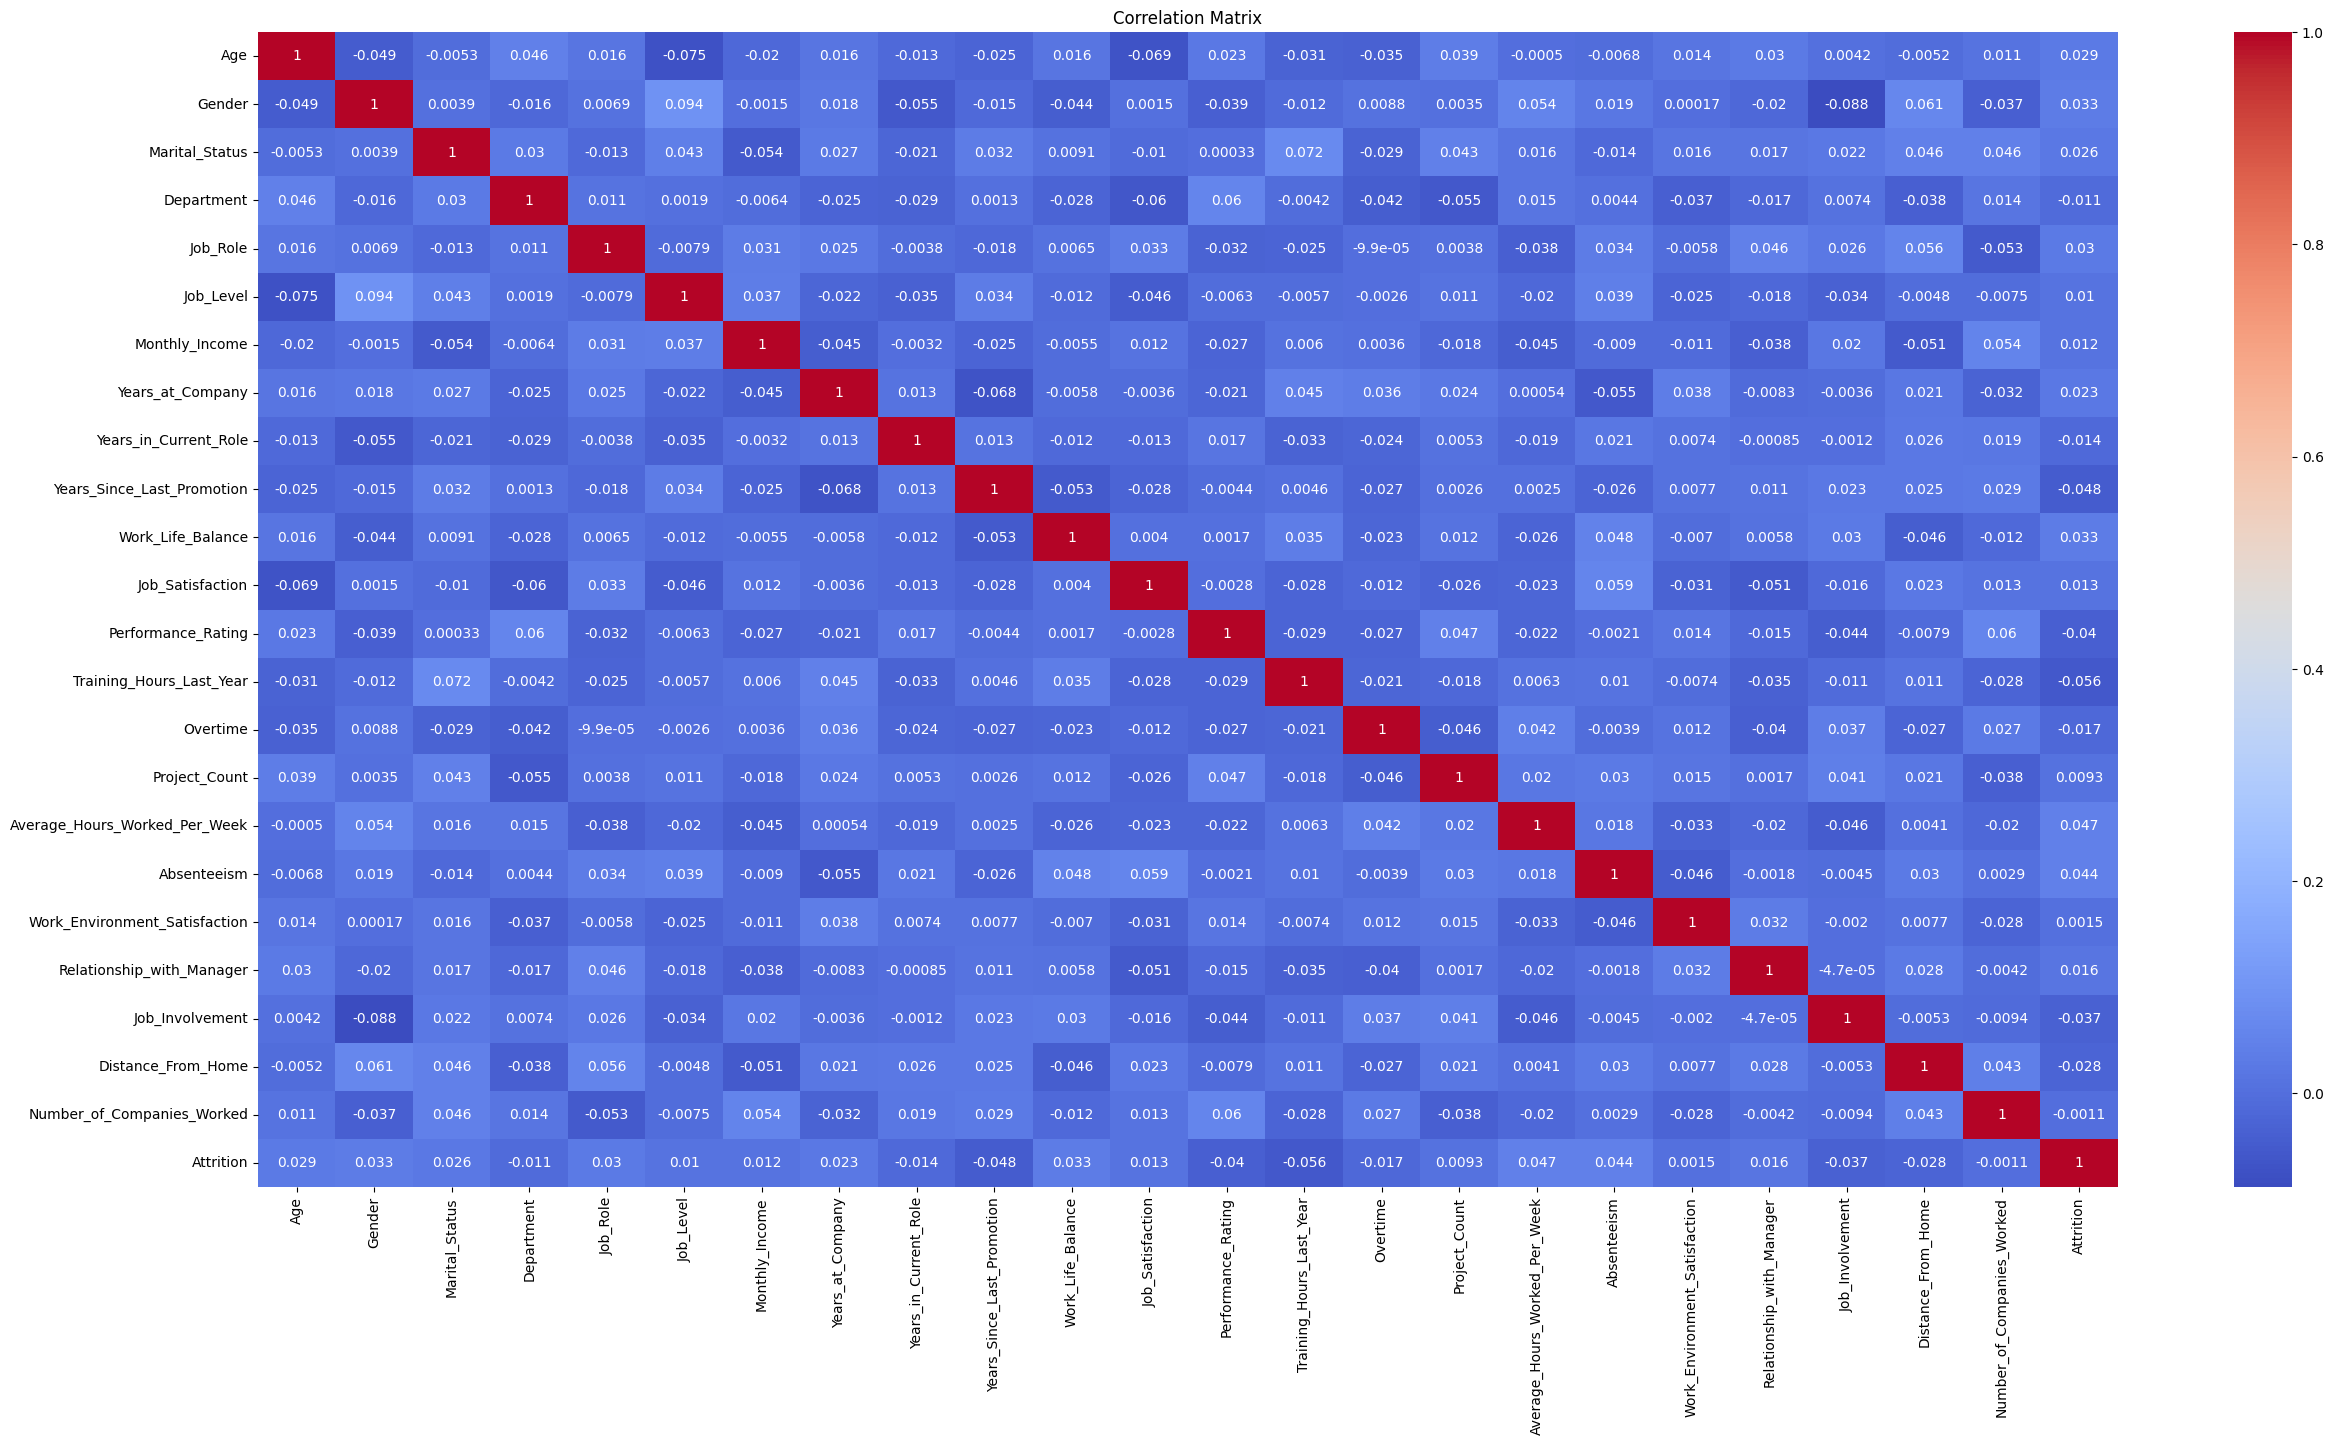

In [ ]:
# show heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Select features that show a notable correlation with 'Attrition' based on the heatmap
heatmap_features = ['Overtime', 'Average_Hours_Worked_Per_Week', 'Work_Environment_Satisfaction', 'Job_Satisfaction', 'Distance_From_Home', 'Age', 'Project_Count', 'Job_Level']
X_heatmap = df_encoded[heatmap_features] #input
y_heatmap = df_encoded['Attrition'] #target

In [ ]:
# Define categorical features for SMOTENC (indices)
# Saya mengambil kategori juga yang sesuai dengan heatmap feauture dan importance yang sesuai.
# Karena ini tergabung cateogircal dan numeric jadi menggunakan SMOTENC
categorical_features = ['Overtime', 'Job_Satisfaction', 'Job_Level', 'Work_Environment_Satisfaction']

cat_indices_heatmap = [X_heatmap.columns.get_loc(col) for col in categorical_features]

# Apply SMOTENC to the heatmap selected features
smotenc = SMOTENC(categorical_features=cat_indices_heatmap, random_state=11)
X_heatmap_res, y_heatmap_res = smotenc.fit_resample(X_heatmap, y_heatmap)

# Split the resampled data
X_train_heatmap, X_test_heatmap, y_train_heatmap, y_test_heatmap = train_test_split(X_heatmap_res, y_heatmap_res, test_size=0.3, random_state=11)

# check the shape of X_train and X_test
X_train_heatmap.shape, X_test_heatmap.shape

((1135, 8), (487, 8))

In [ ]:
# i build a model based on best feature by correlation
heatmap_tree = DecisionTreeClassifier()
heatmap_tree.fit(X_train, y_train)

y_pred_train = heatmap_tree.predict(X_train)
y_pred_test = heatmap_tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       565
           1       1.00      1.00      1.00       570

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       246
           1       0.68      0.74      0.71       241

    accuracy                           0.70       487
   macro avg       0.70      0.70      0.70       487
weighted avg       0.70      0.70      0.70       487



Berdasarkan fitur dengan korelasi tinggi terhadap Attrition, model ini menghasilkan akurasinya menunjukkan 0.70 (70%) dengan f1 score dari rentang 0.69-0.71 yang menunjukkan bahwa modelnya cukup baik dan seimbang. Hal ini juga bisa menjadi faktor dimana overfitting, namun karena adanya fitur yang berkolasi tinggi dapat memberikan hasil prediksi yang baik dengan peforma testing data yang stabil.



# Hyperparameter Tuning using Grid Search

In [ ]:
# Mencari kombinasi parameter terbaik yang menghasilkan performa model (diukur dengan F1-score) paling tinggi.
# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [12, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                          n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 9, 'random_state': 41}
Best cross-validation f1 score: 0.732


Dari hasil tersebut Gini cenderung lebih cepat dibandingkan entropy. Max_Depth 9 menujukkan bahwa kedalaman 10 memberikan keseimbangan yang paling baik. Random state 41 memberikan hasil terbaik saat cross validation, dan hasil f1 0.732 menunjukkan bahwa keseimbangan antara preicision dan recall itu baik, yang berarti model dapat mengenali kelas Attritiond dengan cukup akurat.

In [ ]:
# ambil kombinasi parameter terbaik (yang di atas)
best_params = grid_search.best_params_

# buat mdoel
final_tree = DecisionTreeClassifier(**best_params)
final_tree.fit(X_train, y_train)

y_pred_train = final_tree.predict(X_train)
y_pred_test  = final_tree.predict(X_test)

from sklearn.metrics import classification_report
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.97      0.74      0.84       565
           1       0.79      0.97      0.87       570

    accuracy                           0.86      1135
   macro avg       0.88      0.86      0.86      1135
weighted avg       0.88      0.86      0.86      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.79      0.53      0.64       246
           1       0.64      0.86      0.74       241

    accuracy                           0.69       487
   macro avg       0.72      0.70      0.69       487
weighted avg       0.72      0.69      0.69       487



Nodel bekerja dengan baik saat data train, namun karena nilai tinggi ini menunjukkan overfitiing (model terlalu hafal pada training data). Pada testing set, model mengalami penurunan ke 0.69, karena model terlalu cocok dengan data training, tetapi kurang generalisasi pada data baru. Namun, hasil f1 0.74 pada class 1 masih cukup baik karena model masih ada mengenali kelas minoritas (1).


<h2>Conclusion

 <h2>Identify which model and hyperparameter combination performs best.



The Decision Tree Classifier with the parameters criterion = 'gini', max_depth = 9, and random_state = 41 produced the best overall performance (Hyperparameter Tuning using Grid Search). This model achieved the highest cross-validated F1-score of 0.732, with a test accuracy of 70% and a test F1-score of 0.70, indicating balanced performance across both classes.<br><br>Compared to oversampling methods (SMOTE, SMOTENC), this configuration balances predictive power and generalization, avoiding overfitting while still capturing key relationships such as training hours, Monthly income, and working hours that drive employee attrition.

<h3>Compare baseline vs tuned model performance.

The baseline Decision Tree model achieved an accuracy of 0.67, precision of 0.79, recall of 0.80, and F1-score of 0.79 on the test set. After tuning the model using GridSearchCV, the best model with parameters criterion='gini', max_depth=9, and random_state=41. This shows that hyperparameter tuning slightly improved the model’s performance, making it better at generalizing unseen data even though the improvement was modest.

<h3>Explain how your preprocessing choices (encoding, resampling, etc.) affected model
performance.


The preprocessing steps like encoding categorical features and using SMOTE to balance the dataset, helped the model learn better patterns. Encoding made non-numeric data understandable for the model, while SMOTE reduced bias toward the majority class. As a result, the tuned model became more accurate and performed better on both precision and recall compared to the baseline.